In [ ]:
# step 1. monthly temp January July

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

yr_list = []

imgw_page = 'https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/klimat/'
page = urlopen(imgw_page)
soup = BeautifulSoup(page, 'html.parser')

for link in soup.find_all('a', href=True):
    if str(link.string)[0].isdigit():
        yr_list.append(str(link.string)[:-1])
print(yr_list)

['1951_1955', '1956_1960', '1961_1965', '1966_1970', '1971_1975', '1976_1980', '1981_1985', '1986_1990', '1991_1995', '1996_2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [2]:
import pandas as pd

df = pd.read_fwf('https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/klimat/k_m_t_format.txt', header=None)
head_list = df[0].values.tolist()

del head_list[-1]

for x in range(len(head_list)):
    head_list[x] = head_list[x].split("  ")[0]
    head_list[x] = head_list[x].split(" 6")[0]
print(head_list)

['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiąc', 'Średnia miesięczna temperatura [°C]', 'Status pomiaru TEMP', 'Średnia miesięczna wilgotność względna [%]', 'Status pomiaru WLGS', 'Średnia miesięczna prędkość wiatru [m/s]', 'Status pomiaru FWS', 'Średnie miesięczne zachmurzenie ogólne [oktanty]', 'Status pomiaru NOS']


In [3]:
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

temp_df = pd.DataFrame()

for obs_year in yr_list:
    url = urlopen('https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/klimat/' + obs_year + '/' + obs_year + '_m_k.zip')
    file = ZipFile(BytesIO(url.read()))
    climate_csv = file.open('k_m_t_' + obs_year + '.csv')
    temp_yr_df = pd.read_csv(climate_csv, header=None, encoding ='windows-1250', names=head_list)
    temp_df = pd.concat([temp_df, temp_yr_df], ignore_index=True)
    
temp_df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Średnia miesięczna temperatura [°C],Status pomiaru TEMP,Średnia miesięczna wilgotność względna [%],Status pomiaru WLGS,Średnia miesięczna prędkość wiatru [m/s],Status pomiaru FWS,Średnie miesięczne zachmurzenie ogólne [oktanty],Status pomiaru NOS
0,249200180,LIMANOWA,1952,1,-0.9,NaN,80.3,NaN,3.9,NaN,5.9,NaN
1,249200180,LIMANOWA,1952,2,-2.4,NaN,87.3,NaN,4.4,NaN,7.7,NaN
2,249200180,LIMANOWA,1952,3,-4.9,NaN,78.2,NaN,3.6,NaN,4.8,NaN
3,249200180,LIMANOWA,1952,4,8.6,NaN,78.3,NaN,1.9,NaN,3.8,NaN
4,249200180,LIMANOWA,1952,5,9.9,NaN,80.5,NaN,3.1,NaN,6.4,NaN
5,249200180,LIMANOWA,1952,6,14.3,NaN,79.9,NaN,2.7,NaN,5.7,NaN
6,249200180,LIMANOWA,1952,7,16.5,NaN,76.9,NaN,2.2,NaN,3.6,NaN
7,249200180,LIMANOWA,1952,8,17.4,NaN,80.2,NaN,2.5,NaN,3.9,NaN
8,249200180,LIMANOWA,1952,9,11.1,NaN,83.7,NaN,3.6,NaN,5.8,NaN
9,249200180,LIMANOWA,1952,10,7.0,NaN,85.0,NaN,3.2,NaN,6.4,NaN


In [4]:
temp_df = temp_df.sort_values(['Rok', 'Nazwa stacji', 'Miesiąc'])

temp_df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Średnia miesięczna temperatura [°C],Status pomiaru TEMP,Średnia miesięczna wilgotność względna [%],Status pomiaru WLGS,Średnia miesięczna prędkość wiatru [m/s],Status pomiaru FWS,Średnie miesięczne zachmurzenie ogólne [oktanty],Status pomiaru NOS
1433,252239995,BIAŁA PODLASKA,1951,1,-2.5,NaN,82.6,NaN,4.2,NaN,5.9,NaN
1434,252239995,BIAŁA PODLASKA,1951,2,-1.7,NaN,86.4,NaN,4.0,NaN,6.0,NaN
1435,252239995,BIAŁA PODLASKA,1951,3,0.2,NaN,81.8,NaN,3.7,NaN,6.8,NaN
1436,252239995,BIAŁA PODLASKA,1951,4,9.0,NaN,69.2,NaN,3.4,NaN,4.3,NaN
1437,252239995,BIAŁA PODLASKA,1951,5,12.1,NaN,74.0,NaN,3.2,NaN,5.5,NaN
1438,252239995,BIAŁA PODLASKA,1951,6,17.9,NaN,68.0,NaN,2.6,NaN,4.5,NaN
1439,252239995,BIAŁA PODLASKA,1951,7,18.5,NaN,72.2,NaN,2.8,NaN,4.3,NaN
1440,252239995,BIAŁA PODLASKA,1951,8,20.0,NaN,69.6,NaN,2.3,NaN,3.5,NaN
1441,252239995,BIAŁA PODLASKA,1951,9,15.0,NaN,74.1,NaN,2.8,NaN,3.9,NaN
1442,252239995,BIAŁA PODLASKA,1951,10,4.4,NaN,79.2,NaN,2.9,NaN,4.5,NaN


In [16]:
single_yr_list = temp_df["Rok"].drop_duplicates().tolist()

print(single_yr_list)

[1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [7]:
temp_jan_df = temp_df.loc[(temp_df['Nazwa stacji'].str.contains('WARSZAWA-BIELANY')) & (temp_df['Miesiąc'] == 1)].copy()
temp_jan_df = temp_jan_df.reset_index(drop=True)
temp_jan_df = temp_jan_df.dropna(how='all', axis=1)
temp_jan_df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Średnia miesięczna temperatura [°C],Średnia miesięczna wilgotność względna [%],Średnia miesięczna prędkość wiatru [m/s],Średnie miesięczne zachmurzenie ogólne [oktanty]
0,252200150,WARSZAWA-BIELANY,1951,1,-1.7,82.3,4.9,6.3
1,252200150,WARSZAWA-BIELANY,1952,1,0.0,82.4,3.7,6.9
2,252200150,WARSZAWA-BIELANY,1953,1,-2.1,87.9,4.0,7.2
3,252200150,WARSZAWA-BIELANY,1954,1,-7.7,80.1,4.0,6.1
4,252200150,WARSZAWA-BIELANY,1955,1,-2.9,84.1,3.9,6.5
5,252200150,WARSZAWA-BIELANY,1956,1,-1.5,81.1,4.3,6.2
6,252200150,WARSZAWA-BIELANY,1957,1,-1.1,89.0,3.3,6.0
7,252200150,WARSZAWA-BIELANY,1958,1,-2.6,88.0,2.6,6.1
8,252200150,WARSZAWA-BIELANY,1959,1,-0.8,85.6,3.7,6.3
9,252200150,WARSZAWA-BIELANY,1960,1,-2.5,86.0,2.9,7.0


In [8]:
temp_jul_df = temp_df.loc[(temp_df['Nazwa stacji'].str.contains('WARSZAWA-BIELANY')) & (temp_df['Miesiąc'] == 7)].copy()
temp_jul_df = temp_jul_df.reset_index(drop=True)
temp_jul_df = temp_jul_df.dropna(how='all', axis=1)
temp_jul_df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Średnia miesięczna temperatura [°C],Średnia miesięczna wilgotność względna [%],Średnia miesięczna prędkość wiatru [m/s],Średnie miesięczne zachmurzenie ogólne [oktanty]
0,252200150,WARSZAWA-BIELANY,1951,7,19.0,68.5,3.1,5.1
1,252200150,WARSZAWA-BIELANY,1952,7,19.7,60.9,2.4,4.0
2,252200150,WARSZAWA-BIELANY,1953,7,20.9,68.0,2.4,4.8
3,252200150,WARSZAWA-BIELANY,1954,7,17.5,77.1,2.6,5.9
4,252200150,WARSZAWA-BIELANY,1955,7,19.6,75.2,4.9,4.8
5,252200150,WARSZAWA-BIELANY,1956,7,17.8,75.5,3.1,4.9
6,252200150,WARSZAWA-BIELANY,1957,7,19.5,76.1,2.8,5.2
7,252200150,WARSZAWA-BIELANY,1958,7,19.3,71.5,2.5,4.2
8,252200150,WARSZAWA-BIELANY,1959,7,21.6,73.2,2.4,4.4
9,252200150,WARSZAWA-BIELANY,1960,7,17.2,81.0,3.1,6.0


In [10]:
temp_jan_list = temp_jan_df["Średnia miesięczna temperatura [°C]"].tolist()
print(len(temp_jan_list))

69


In [27]:
temp_jul_list = temp_jul_df["Średnia miesięczna temperatura [°C]"].tolist()
# no July 2019
temp_jul_list.append(None)
print(len(temp_jul_list))

69


In [18]:
%matplotlib inline

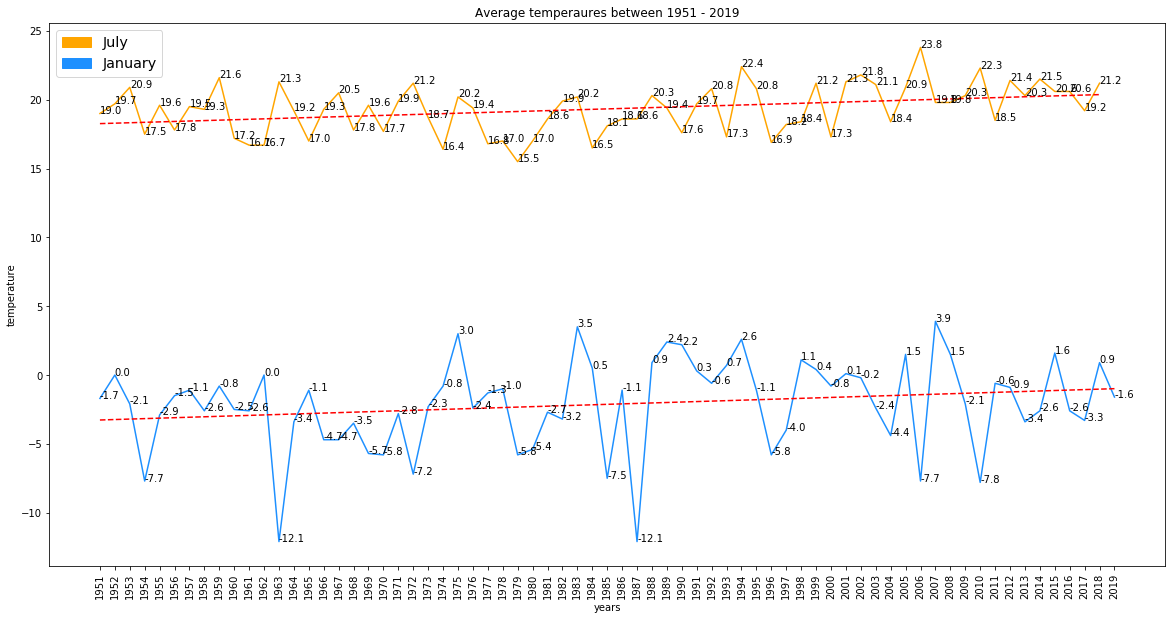

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

x_labels = single_yr_list
y_temp_jan = temp_jan_list
y_temp_jul = temp_jul_list

plt.plot(x_labels, y_temp_jan, color = 'dodgerblue')
for a,b in zip(x_labels, y_temp_jan): 
    plt.text(a, b, str(b))

z = np.polyfit(x_labels, y_temp_jan, 1)
p = np.poly1d(z)
plt.plot(x_labels,p(x_labels),"r--") 
    
plt.plot(x_labels, y_temp_jul, color = 'orange')
for a,b in zip(x_labels, y_temp_jul[:-1]):
    plt.text(a, b, str(b))

z = np.polyfit(x_labels[:-1], y_temp_jul[:-1], 1)
p = np.poly1d(z)
plt.plot(x_labels[:-1],p(x_labels[:-1]),"r--")
 
plt.title('Average temperaures between 1951 - 2019')

plt.xlabel('years')
plt.ylabel('temperature')
plt.xticks(x_labels, rotation = 'vertical')

orange_patch = mpatches.Patch(color = 'orange', label = 'July')
blue_patch = mpatches.Patch(color = 'dodgerblue', label = 'January')
plt.legend(handles = [orange_patch, blue_patch], loc=2, fontsize = 'x-large')

plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [ ]:
# step 2. daily avg yearly

In [191]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

yr_list = []

imgw_page = 'https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/'
page = urlopen(imgw_page)
soup = BeautifulSoup(page, 'html.parser')

for link in soup.find_all('a', href=True):
    if str(link.string)[0].isdigit():
        yr_list.append(str(link.string)[:-1])
print(yr_list)

['1951_1955', '1956_1960', '1961_1965', '1966_1970', '1971_1975', '1976_1980', '1981_1985', '1986_1990', '1991_1995', '1996_2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [192]:
import pandas as pd

file_name = r'https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/k_d_t_format.txt'

df = pd.read_fwf(file_name, header=None, encoding='windows-1250')
head_list = df[0].values.tolist()

del head_list[-1]

for x in range(len(head_list)):
    head_list[x] = head_list[x].split("  ")[0]
    head_list[x] = head_list[x].split(" 6")[0]
print(head_list)

['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiąc', 'Dzień', 'Średnia dobowa temperatura', 'Status pomiaru TEMP', 'Średnia dobowa wilgotność względna [%]', 'Status pomiaru WLGS', 'Średnia dobowa prędkość wiatru [m/s]', 'Status pomiaru FWS', 'Średnie dobowe zachmurzenie ogólne [oktanty]', 'Status pomiaru NOS']


In [193]:
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

df = pd.DataFrame()

mth_list = ['01','02','03','04','05','06','07','08','09','10','11','12']

for obs_year in yr_list:
    if len(obs_year) > 4:
        temp_list = obs_year.split('_')
        min_temp_list = int(min(temp_list))
        max_temp_list = int(max(temp_list)) + 1
        for det_year in range(min_temp_list, max_temp_list):
            url = urlopen('https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/' + obs_year + '/' + str(det_year) + '_k.zip')
            file = ZipFile(BytesIO(url.read()))
            climate_csv = file.open('k_d_t_' + str(det_year) + '.csv')
            temp_yr_df = pd.read_csv(climate_csv, header=None, encoding='windows-1250', names=head_list)
            df = pd.concat([df, temp_yr_df], ignore_index=True)
    else:
        try:
            for obs_month in mth_list:
                url = urlopen('https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/' + obs_year + '/' + obs_year + '_' + obs_month + '_k.zip')
                file = ZipFile(BytesIO(url.read()))
                climate_csv = file.open('k_d_t_' + obs_month + '_' + obs_year + '.csv')
                temp_yr_df = pd.read_csv(climate_csv, header=None, encoding='windows-1250', names=head_list)
                df = pd.concat([df, temp_yr_df], ignore_index=True)
        except:
            break
df.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Średnia dobowa temperatura,Status pomiaru TEMP,Średnia dobowa wilgotność względna [%],Status pomiaru WLGS,Średnia dobowa prędkość wiatru [m/s],Status pomiaru FWS,Średnie dobowe zachmurzenie ogólne [oktanty],Status pomiaru NOS
0,249220040,DYNÓW,1951,1,1,-0.6,NaN,84.8,NaN,6.0,NaN,4.7,NaN
1,249220040,DYNÓW,1951,1,2,2.2,NaN,73.0,NaN,1.3,NaN,2.7,NaN
2,249220040,DYNÓW,1951,1,3,-0.8,NaN,84.5,NaN,1.3,NaN,3.3,NaN
3,249220040,DYNÓW,1951,1,4,1.6,NaN,92.8,NaN,1.7,NaN,8.0,NaN
4,249220040,DYNÓW,1951,1,5,1.6,NaN,90.3,NaN,0.7,NaN,8.0,NaN


In [175]:
df.shape

(3642322, 13)

In [194]:
# save raw file
file_name = r'C:\Users\PJanus\Documents\Python excercises\IMGW\imgw_temp_raw.csv.gz'
df.to_csv(file_name, sep='\t', encoding='windows-1250', index=False, compression='gzip')

In [ ]:
# data shaping for Tableau

In [276]:
file_name = r'C:\Users\PJanus\Documents\Python excercises\IMGW\imgw_temp_raw.csv.gz'
df = pd.read_csv(file_name, sep='\t', encoding='windows-1250')
df.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Średnia dobowa temperatura,Status pomiaru TEMP,Średnia dobowa wilgotność względna [%],Status pomiaru WLGS,Średnia dobowa prędkość wiatru [m/s],Status pomiaru FWS,Średnie dobowe zachmurzenie ogólne [oktanty],Status pomiaru NOS
0,249220040,DYNÓW,1951,1,1,-0.6,NaN,84.8,NaN,6.0,NaN,4.7,NaN
1,249220040,DYNÓW,1951,1,2,2.2,NaN,73.0,NaN,1.3,NaN,2.7,NaN
2,249220040,DYNÓW,1951,1,3,-0.8,NaN,84.5,NaN,1.3,NaN,3.3,NaN
3,249220040,DYNÓW,1951,1,4,1.6,NaN,92.8,NaN,1.7,NaN,8.0,NaN
4,249220040,DYNÓW,1951,1,5,1.6,NaN,90.3,NaN,0.7,NaN,8.0,NaN


In [196]:
df.shape

(3642322, 13)

In [217]:
df_temp = df.loc[(df.Rok == 1951)]
# print(df_temp['Nazwa stacji'].unique())
set(df_temp['Nazwa stacji'])

{'BIAŁA PODLASKA',
 'BIAŁOWIEŻA',
 'BIAŁYSTOK',
 'BIELSKO-BIAŁA',
 'BYDGOSZCZ',
 'CHOJNICE',
 'CZĘSTOCHOWA',
 'DARŁOWO',
 'DYNÓW',
 'ELBLĄG-MILEJEWO',
 'GDAŃSK-RĘBIECHOWO',
 'GDAŃSK-ŚWIBNO',
 'GDYNIA',
 'GNIEZNO',
 'GORZÓW WIELKOPOLSKI',
 'HEL',
 'JELENIA GÓRA',
 'KALISZ',
 'KARPACZ',
 'KASPROWY WIERCH',
 'KATOWICE',
 'KIELCE-SUKÓW',
 'KOSZALIN',
 'KOŁO',
 'KOŁOBRZEG',
 'KOŁUDA WIELKA',
 'KRAKÓW-BALICE',
 'KRAKÓW-OBSERWATORIUM',
 'KÓRNIK',
 'KŁODZKO',
 'LEGIONOWO',
 'LEGNICA',
 'LIDZBARK WARMIŃSKI',
 'LUBLIN-RADAWIEC',
 'LĘBORK',
 'NIEPOKALANÓW',
 'OLSZTYN',
 'OPOLE',
 'OSTROŁĘKA',
 'POZNAŃ',
 'POŚWIĘTNE',
 'PRABUTY',
 'PUCZNIEW',
 'PUŁAWY',
 'PUŁTUSK',
 'PŁOCK',
 'RACIBÓRZ',
 'RESKO-SMÓLSKO',
 'ROZEWIE',
 'SANDOMIERZ',
 'SANOK-TREPCZA',
 'SIEDLCE',
 'SIERADZ',
 'SKIERNIEWICE',
 'SUWAŁKI',
 'SZAMOTUŁY-BABORÓWKO',
 'SZCZECIN',
 'SZCZECINEK',
 'SZCZYTNO',
 'SZEPIETOWO',
 'SŁUBICE',
 'SŁUPSK',
 'TARNÓW',
 'TOLKMICKO',
 'TOMASZÓW LUBELSKI',
 'TORUŃ',
 'TRZEBIEŻ',
 'USTKA',
 'WARSZAWA',
 'W

In [ ]:
# LEGIONOWO

In [277]:
df = df.sort_values(['Rok', 'Nazwa stacji', 'Miesiąc', 'Dzień'])
df.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Średnia dobowa temperatura,Status pomiaru TEMP,Średnia dobowa wilgotność względna [%],Status pomiaru WLGS,Średnia dobowa prędkość wiatru [m/s],Status pomiaru FWS,Średnie dobowe zachmurzenie ogólne [oktanty],Status pomiaru NOS
8360,252239995,BIAŁA PODLASKA,1951,1,1,-4.4,NaN,85.5,NaN,3.0,NaN,8.0,NaN
8361,252239995,BIAŁA PODLASKA,1951,1,2,-1.2,NaN,89.8,NaN,3.7,NaN,5.3,NaN
8362,252239995,BIAŁA PODLASKA,1951,1,3,0.8,NaN,86.3,NaN,5.3,NaN,6.7,NaN
8363,252239995,BIAŁA PODLASKA,1951,1,4,-0.1,NaN,94.5,NaN,2.7,NaN,8.0,NaN
8364,252239995,BIAŁA PODLASKA,1951,1,5,-0.7,NaN,96.5,NaN,1.3,NaN,8.0,NaN


In [278]:
df_leg = df.loc[(df['Nazwa stacji'].str.contains('LEGIONOWO'))].copy()
df_leg = df_leg.reset_index(drop=True)
df_leg = df_leg.dropna(how='all', axis=1)
df_leg = df_leg.groupby(['Nazwa stacji', 'Rok'], as_index=False)['Średnia dobowa temperatura'].mean().round(1)
# print(type(df_leg))
df_leg

,Nazwa stacji,Rok,Średnia dobowa temperatura
0,LEGIONOWO,1951,10.1
1,LEGIONOWO,1952,7.5
2,LEGIONOWO,1953,8.5
3,LEGIONOWO,1954,7.3
4,LEGIONOWO,1955,7.8
5,LEGIONOWO,1956,6.4
6,LEGIONOWO,1957,8.5
7,LEGIONOWO,1958,7.9
8,LEGIONOWO,1959,8.5
9,LEGIONOWO,1960,8.0


In [237]:
df_leg.shape

(24952, 11)

In [279]:
# save raw file
file_name = r'C:\Users\PJanus\Documents\Python excercises\IMGW\imgw_temp_leg_raw.csv'
df_leg.to_csv(file_name, sep='\t', encoding='windows-1250', index=False)

In [280]:
file_name = r'C:\Users\PJanus\Documents\Python excercises\IMGW\imgw_temp_leg_raw.csv'
df_leg = pd.read_csv(file_name, sep='\t', encoding='windows-1250')
df_leg.head()

,Nazwa stacji,Rok,Średnia dobowa temperatura
0,LEGIONOWO,1951,10.1
1,LEGIONOWO,1952,7.5
2,LEGIONOWO,1953,8.5
3,LEGIONOWO,1954,7.3
4,LEGIONOWO,1955,7.8


In [ ]:
# matplotlib

In [272]:
# temp_year = df_leg.groupby(['Rok'])['Średnia dobowa temperatura'].mean().round(1).tolist()
temp_year = df_leg['Średnia dobowa temperatura'].tolist()
temp_year = temp_year[:-1]
temp_year

[10.1,
 7.5,
 8.5,
 7.3,
 7.8,
 6.4,
 8.5,
 7.9,
 8.5,
 8.0,
 8.6,
 7.2,
 7.1,
 7.5,
 6.8,
 8.3,
 9.0,
 8.1,
 6.9,
 7.2,
 8.4,
 7.9,
 8.0,
 8.2,
 9.3,
 7.1,
 8.2,
 7.1,
 7.3,
 6.6,
 7.9,
 8.5,
 9.4,
 8.1,
 7.0,
 8.3,
 6.6,
 8.5,
 10.1,
 9.6,
 8.3,
 9.0,
 8.0,
 9.2,
 8.5,
 6.8,
 8.0,
 8.3,
 9.1,
 9.7,
 8.6,
 9.4,
 8.4,
 8.5,
 8.6,
 8.8,
 9.5,
 9.6,
 8.6,
 7.7,
 8.9,
 8.6,
 8.7,
 9.5,
 10.1,
 9.5,
 9.2,
 10.1]

In [97]:
single_yr_list = temp_df["Rok"].drop_duplicates().tolist()

print(single_yr_list)

[1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


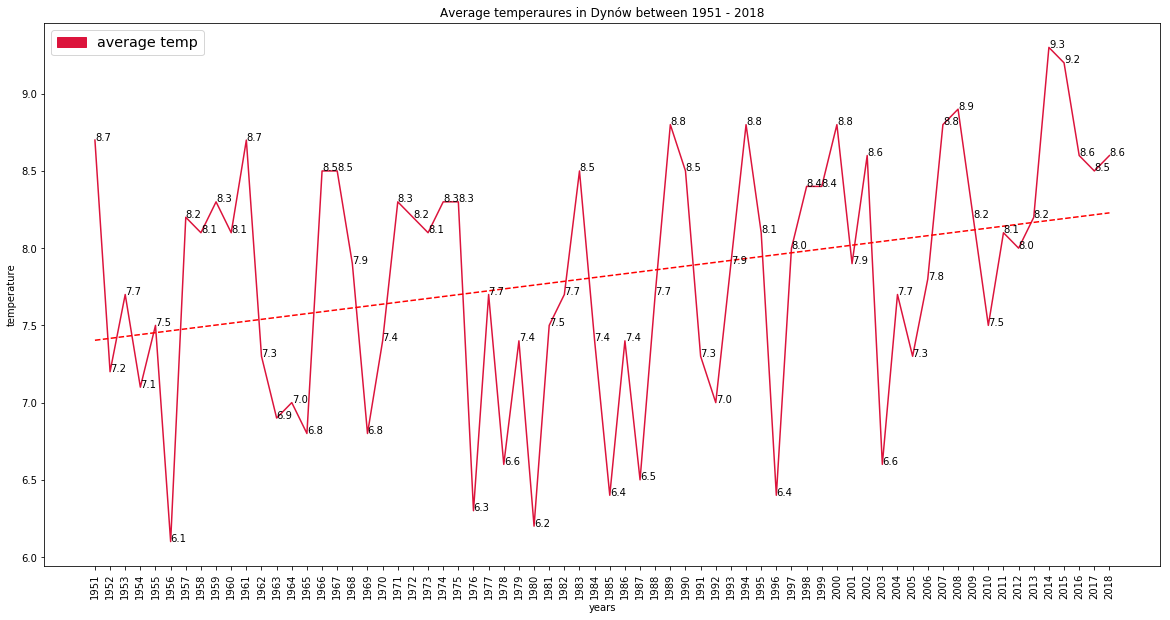

In [103]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

x_labels = single_yr_list[:-1]
y_temp_year = temp_year

plt.plot(x_labels, y_temp_year, color = 'crimson')
for a,b in zip(x_labels, y_temp_year): 
    plt.text(a, b, str(b))

z = np.polyfit(x_labels, y_temp_year, 1)
p = np.poly1d(z)
plt.plot(x_labels,p(x_labels),"r--") 
    
plt.title('Average temperaures in Dynów between 1951 - 2018')

plt.xlabel('years')
plt.ylabel('temperature')
plt.xticks(x_labels, rotation = 'vertical')

blue_patch = mpatches.Patch(color = 'crimson', label = 'average temp')
plt.legend(handles = [blue_patch], loc=2, fontsize = 'x-large')

plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [ ]:
# Precipitation

In [145]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

yr_list = []

imgw_page = 'https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/opad/'
page = urlopen(imgw_page)
soup = BeautifulSoup(page, 'html.parser')

for link in soup.find_all('a', href=True):
    if str(link.string)[0].isdigit():
        yr_list.append(str(link.string)[:-1])
print(yr_list)

['1950_1955', '1956_1960', '1961_1965', '1966_1970', '1971_1975', '1976_1980', '1981_1985', '1986_1990', '1991_1995', '1996_2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [156]:
import pandas as pd

file_name = r'https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/opad/o_m_format.txt'

df = pd.read_fwf(file_name, header=None, encoding='windows-1250')
head_list = df[0].values.tolist()

del head_list[-3:]
del head_list[0]

for x in range(len(head_list)):
    head_list[x] = head_list[x].split("  ")[0]
print(head_list)

['Kod stacji', 'Nazwa stacji', 'Rok', 'Miesiąc', 'Miesięczna suma opadów [mm]', 'Status pomiaru SUMM', 'Liczba dni z opadem śniegu', 'Status pomiaru LDS', 'Opad maksymalny [mm]', 'Status pomiaru MAXO', 'Dzień pierwszy wystąpienia opadu maksymalnego', 'Dzień ostatni wystąpienia opadu maksymalnego', 'Liczba dni z pokrywą śnieżną', 'Status pomiaru LDPS']


In [157]:
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

df = pd.DataFrame()

for obs_year in yr_list:
    url = urlopen('https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/opad/' + obs_year + '/' + obs_year + '_m_o.zip')
    file = ZipFile(BytesIO(url.read()))
    climate_csv = file.open('o_m_' + obs_year + '.csv')
    temp_yr_df = pd.read_csv(climate_csv, header=None, encoding ='windows-1250', names=head_list)
    df = pd.concat([df, temp_yr_df], ignore_index=True)
df.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Miesięczna suma opadów [mm],Status pomiaru SUMM,Liczba dni z opadem śniegu,Status pomiaru LDS,Opad maksymalny [mm],Status pomiaru MAXO,Dzień pierwszy wystąpienia opadu maksymalnego,Dzień ostatni wystąpienia opadu maksymalnego,Liczba dni z pokrywą śnieżną,Status pomiaru LDPS
0,249180020,WARSZOWICE,1951,5,119.2,NaN,0,NaN,25.8,NaN,10.0,NaN,0,NaN
1,249180020,WARSZOWICE,1951,6,55.0,NaN,0,NaN,21.3,NaN,24.0,NaN,0,NaN
2,249180020,WARSZOWICE,1951,7,56.9,NaN,0,NaN,23.1,NaN,12.0,NaN,0,NaN
3,249180020,WARSZOWICE,1951,8,26.5,NaN,0,NaN,11.1,NaN,9.0,NaN,0,NaN
4,249180020,WARSZOWICE,1951,9,28.0,NaN,0,NaN,0.0,8.0,NaN,NaN,0,8.0


In [158]:
df.shape

(785142, 14)

In [164]:
# save raw file
file_name = r'C:\Users\PJanus\Documents\Python excercises\IMGW\imgw_prec_raw.csv.gz'
df.to_csv(file_name, sep='\t', encoding='windows-1250', index=False, compression='gzip')

In [ ]:
# data shaping for Tableau

In [281]:
file_name = r'C:\Users\PJanus\Documents\Python excercises\IMGW\imgw_prec_raw.csv.gz'
df = pd.read_csv(file_name, sep='\t', encoding='windows-1250')
df.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Miesięczna suma opadów [mm],Status pomiaru SUMM,Liczba dni z opadem śniegu,Status pomiaru LDS,Opad maksymalny [mm],Status pomiaru MAXO,Dzień pierwszy wystąpienia opadu maksymalnego,Dzień ostatni wystąpienia opadu maksymalnego,Liczba dni z pokrywą śnieżną,Status pomiaru LDPS
0,249180020,WARSZOWICE,1951,5,119.2,NaN,0,NaN,25.8,NaN,10.0,NaN,0,NaN
1,249180020,WARSZOWICE,1951,6,55.0,NaN,0,NaN,21.3,NaN,24.0,NaN,0,NaN
2,249180020,WARSZOWICE,1951,7,56.9,NaN,0,NaN,23.1,NaN,12.0,NaN,0,NaN
3,249180020,WARSZOWICE,1951,8,26.5,NaN,0,NaN,11.1,NaN,9.0,NaN,0,NaN
4,249180020,WARSZOWICE,1951,9,28.0,NaN,0,NaN,0.0,8.0,NaN,NaN,0,8.0


In [167]:
df.shape

(785142, 14)

In [221]:
df_temp = df.loc[(df.Rok == 2019)]
# print(df_temp['Nazwa stacji'].unique())
set(df_temp['Nazwa stacji'])

{'ALEKSANDRÓWKA',
 'ANNOPOL',
 'BACIUTY',
 'BACZE SUCHE',
 'BAKAŁARZEWO',
 'BANIE MAZURSKIE',
 'BARCIANY',
 'BARDO ŚLĄSKIE',
 'BARTODZIEJE',
 'BARTOSZYCE',
 'BARWICE',
 'BASINÓW',
 'BAŃSKA WYŻNA',
 'BEŁCHATÓW',
 'BIAŁCZYK',
 'BIAŁKA TATRZAŃSKA',
 'BIAŁOBRZEGI',
 'BIERNA',
 'BIERUTÓW',
 'BIERUŃ STARY',
 'BINOWO',
 'BISKUPIEC',
 'BOBROWNIKI',
 'BOBRY',
 'BOCZÓW',
 'BOGATYNIA',
 'BOGDANÓWKA',
 'BOGUSZÓW-GORCE',
 'BOLESZKOWICE',
 'BOLESŁAWÓW',
 'BOLKÓW',
 'BONOWICE',
 'BORKOWO',
 'BOROWIEC',
 'BOROWY MŁYN',
 'BORÓW',
 'BOŻEPOLE SZLACHECKIE',
 'BRANICE',
 'BRAŃSK',
 'BRENNA-LEŚNICA',
 'BRODNICA',
 'BRODY IŁŻECKIE',
 'BRUDNICE',
 'BRUSKOWO MAŁE',
 'BRYNICA',
 'BRZEGI DOLNE',
 'BRZEŹNIAK',
 'BRZUZE',
 'BUCZYNIEC',
 'BUKOWIEC',
 'BUKOWINA',
 'BUKÓWKA',
 'BURZYN',
 'BYDGOSZCZ',
 'BYSZWAŁD',
 'BĄKOWO',
 'BŁOTNICA',
 'CHEŁMSKO ŚLĄSKIE',
 'CHEŁSTY',
 'CHOCZ',
 'CHOJNA',
 'CHOSZCZNO',
 'CHRZANÓW',
 'CHWAŁKOWICE',
 'CIECHANOWICE',
 'CIELĘTNIKI',
 'CIERPIĘTA',
 'CIESZYN',
 'CISNA',
 'CISOWA',
 'CIĘŻK

In [ ]:
# ZAKROCZYM

In [282]:
df = df.sort_values(['Rok', 'Nazwa stacji', 'Miesiąc'])
df.head()

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Miesięczna suma opadów [mm],Status pomiaru SUMM,Liczba dni z opadem śniegu,Status pomiaru LDS,Opad maksymalny [mm],Status pomiaru MAXO,Dzień pierwszy wystąpienia opadu maksymalnego,Dzień ostatni wystąpienia opadu maksymalnego,Liczba dni z pokrywą śnieżną,Status pomiaru LDPS
13284,250210030,ANNOPOL,1950,11,48.4,NaN,0,NaN,12.2,NaN,15.0,NaN,0,8.0
13285,250210030,ANNOPOL,1950,12,54.7,NaN,0,NaN,14.2,NaN,11.0,NaN,0,8.0
25718,252189994,BABIAK,1950,11,31.7,NaN,0,NaN,12.3,NaN,21.0,NaN,0,8.0
25719,252189994,BABIAK,1950,12,43.2,NaN,0,NaN,14.5,NaN,10.0,NaN,0,8.0
24473,252179996,BACHORZEW,1950,11,46.4,NaN,0,NaN,20.0,NaN,24.0,NaN,0,8.0


In [283]:
df_leg = df.loc[(df['Nazwa stacji'].str.contains('ZAKROCZYM'))].copy()
df_leg = df_leg.reset_index(drop=True)
df_leg = df_leg.dropna(how='all', axis=1)
df_leg = df_leg.groupby(['Nazwa stacji', 'Rok'], as_index=False)['Miesięczna suma opadów [mm]'].sum().round(1)
# print(type(df_leg))
df_leg

,Nazwa stacji,Rok,Miesięczna suma opadów [mm]
0,ZAKROCZYM,1951,356.1
1,ZAKROCZYM,1952,501.1
2,ZAKROCZYM,1953,447.3
3,ZAKROCZYM,1954,468.3
4,ZAKROCZYM,1955,453.7
5,ZAKROCZYM,1956,519.1
6,ZAKROCZYM,1957,551.6
7,ZAKROCZYM,1958,537.5
8,ZAKROCZYM,1959,365.2
9,ZAKROCZYM,1960,549.7


In [286]:
# save raw file
file_name = r'C:\Users\PJanus\Documents\Python excercises\IMGW\imgw_prec_zak_raw.csv'
df_leg.to_csv(file_name, sep='\t', encoding='windows-1250', index=False)

In [288]:
file_name = r'C:\Users\PJanus\Documents\Python excercises\IMGW\imgw_prec_zak_raw.csv'
df_leg = pd.read_csv(file_name, sep='\t', encoding='windows-1250')
df_leg.head()

,Nazwa stacji,Rok,MiesiÄ™czna suma opadĂłw [mm]
0,ZAKROCZYM,1951,356.1
1,ZAKROCZYM,1952,501.1
2,ZAKROCZYM,1953,447.3
3,ZAKROCZYM,1954,468.3
4,ZAKROCZYM,1955,453.7
